In [1]:
import pandas as pd
import numpy as np


# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Preprocessing and Exploration Part 2 <a id='DataPrep'></a>

### Question of interest

The task to investigate the data qualtiy and relationships among all the features: 

> How do gender, personality type, education background, demographic data affect or shows the drug consumption pattern among these individual as well as group level.

In [2]:
# Loading the cleaned dataset

df = pd.read_csv('drug_consumption_mapped.csv')


In [3]:
# Describing the size of the dataframe
df.shape

(1885, 35)

In [4]:
# Display the top n number of rows
df.head()

,Unnamed: 0,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,...,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Impulsive_class,SS_class
0,0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,39,36,42.0,...,Never,Never,Never,Never,Never,Last Decade,Never,Never,Average,Low
1,1,2,25 - 34,Male,Doctorate Degree,UK,White,29,52,55.0,...,Last Decade,Never,Last Decade,Last Year,Never,Last Month,Never,Never,Average,Average
2,2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,31,45,40.0,...,Never,Never,Never,Never,Decade Ago,Never,Never,Never,Moderate,Average
3,3,4,18 - 24,Female,Masters Degree,UK,White,34,34,46.0,...,Last Decade,Never,Never,Never,Never,Last Decade,Never,Never,Moderate,Low
4,4,5,35 - 44,Female,Doctorate Degree,UK,White,43,28,43.0,...,Never,Decade Ago,Never,Never,Last Decade,Last Decade,Never,Never,Average,Average


In [5]:
# use .duplicated() to check for duplicates 

print(df.duplicated().sum())

# get the proportion of the rows that are duplicates
print(df.duplicated().mean)

0
<bound method Series.mean of 0       False
1       False
2       False
3       False
4       False
        ...  
1880    False
1881    False
1882    False
1883    False
1884    False
Length: 1885, dtype: bool>


In [6]:
#We can now check the data to see if there are any null values and deal with them.
df.isna().sum()

Unnamed: 0          0
ID                  0
Age                 0
Gender              0
Education           0
Country             0
Ethnicity           0
Nscore              0
Escore              0
Oscore             19
Ascore              0
Cscore              0
Impulsive           0
SS                  0
Alcohol             0
Amphet              0
Amyl                0
Benzos              0
Caff                0
Cannabis            0
Choc                0
Coke                0
Crack               0
Ecstasy             0
Heroin              0
Ketamine            0
Legalh              0
LSD                 0
Meth                0
Mushrooms           0
Nicotine            0
Semer               0
VSA                 0
Impulsive_class     0
SS_class            0
dtype: int64

In [7]:
# Its also useful to calculate the proportion of nulls missing 
df.isna().mean()*100

Unnamed: 0         0.000000
ID                 0.000000
Age                0.000000
Gender             0.000000
Education          0.000000
Country            0.000000
Ethnicity          0.000000
Nscore             0.000000
Escore             0.000000
Oscore             1.007958
Ascore             0.000000
Cscore             0.000000
Impulsive          0.000000
SS                 0.000000
Alcohol            0.000000
Amphet             0.000000
Amyl               0.000000
Benzos             0.000000
Caff               0.000000
Cannabis           0.000000
Choc               0.000000
Coke               0.000000
Crack              0.000000
Ecstasy            0.000000
Heroin             0.000000
Ketamine           0.000000
Legalh             0.000000
LSD                0.000000
Meth               0.000000
Mushrooms          0.000000
Nicotine           0.000000
Semer              0.000000
VSA                0.000000
Impulsive_class    0.000000
SS_class           0.000000
dtype: float64

In [8]:
# use axis=0 to drop rows, As the missing data in 'Oscore' only 1% of total data, so I am dropping 19 rows.
df = df.dropna(subset=['Oscore',], axis=0)

In [9]:
# Its also useful to calculate the proportion of nulls missing 
df.isna().mean()*100

Unnamed: 0         0.0
ID                 0.0
Age                0.0
Gender             0.0
Education          0.0
Country            0.0
Ethnicity          0.0
Nscore             0.0
Escore             0.0
Oscore             0.0
Ascore             0.0
Cscore             0.0
Impulsive          0.0
SS                 0.0
Alcohol            0.0
Amphet             0.0
Amyl               0.0
Benzos             0.0
Caff               0.0
Cannabis           0.0
Choc               0.0
Coke               0.0
Crack              0.0
Ecstasy            0.0
Heroin             0.0
Ketamine           0.0
Legalh             0.0
LSD                0.0
Meth               0.0
Mushrooms          0.0
Nicotine           0.0
Semer              0.0
VSA                0.0
Impulsive_class    0.0
SS_class           0.0
dtype: float64

In [10]:
# Checking the values after dropping 19 rows from the 1885 total number of rows due to NaN in Oscore. Describing the size of the dataframe
df.shape

(1866, 35)

In [11]:
# Converting 'Oscore' into 'int' datatype
df['Oscore'] = df['Oscore'].astype(int)

In [12]:
df.head()

,Unnamed: 0,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,...,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Impulsive_class,SS_class
0,0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,39,36,42,...,Never,Never,Never,Never,Never,Last Decade,Never,Never,Average,Low
1,1,2,25 - 34,Male,Doctorate Degree,UK,White,29,52,55,...,Last Decade,Never,Last Decade,Last Year,Never,Last Month,Never,Never,Average,Average
2,2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,31,45,40,...,Never,Never,Never,Never,Decade Ago,Never,Never,Never,Moderate,Average
3,3,4,18 - 24,Female,Masters Degree,UK,White,34,34,46,...,Last Decade,Never,Never,Never,Never,Last Decade,Never,Never,Moderate,Low
4,4,5,35 - 44,Female,Doctorate Degree,UK,White,43,28,43,...,Never,Decade Ago,Never,Never,Last Decade,Last Decade,Never,Never,Average,Average


In [13]:
# Getting the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1866 entries, 0 to 1884
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1866 non-null   int64  
 1   ID               1866 non-null   int64  
 2   Age              1866 non-null   object 
 3   Gender           1866 non-null   object 
 4   Education        1866 non-null   object 
 5   Country          1866 non-null   object 
 6   Ethnicity        1866 non-null   object 
 7   Nscore           1866 non-null   int64  
 8   Escore           1866 non-null   int64  
 9   Oscore           1866 non-null   int64  
 10  Ascore           1866 non-null   int64  
 11  Cscore           1866 non-null   int64  
 12  Impulsive        1866 non-null   float64
 13  SS               1866 non-null   float64
 14  Alcohol          1866 non-null   object 
 15  Amphet           1866 non-null   object 
 16  Amyl             1866 non-null   object 
 17  Benzos           18

### Question of interest

The task to investigate the data qualtiy and relationships among all the features: 

> How do gender, personality type, education background, demographic data affect or shows the drug consumption pattern among these individual as well as group level.

# INDEX

[EDA and Data Preprocessing](#DataPrep)

- [Part 1: Data Exploration](#Reading)
- [Part 2: EDA](#Part2)
- [Hyphothesis](#H)
<a id='INDEX'></a>

--------

## EDA - Visualisation and Data Analysis (Part 1) <a id='EDA'></a>

-------
**Note**: I will add more EDA in the later submission. This is just the first part of EDA.

#### Observe trends and relationships between variables that help us answer our question(s)


Using visualizations is an important part of understanding patterns that tables and summary statistics cannot portray. There are two main types of visualizations we should always leverage at this stage: 
    
   - Univariate visualizations: one variable at a time
   - Multivariate visualizations: two or more variables at a time

In [14]:
cat_cols = df.dtypes[df.dtypes.values == 'object'].index.tolist()

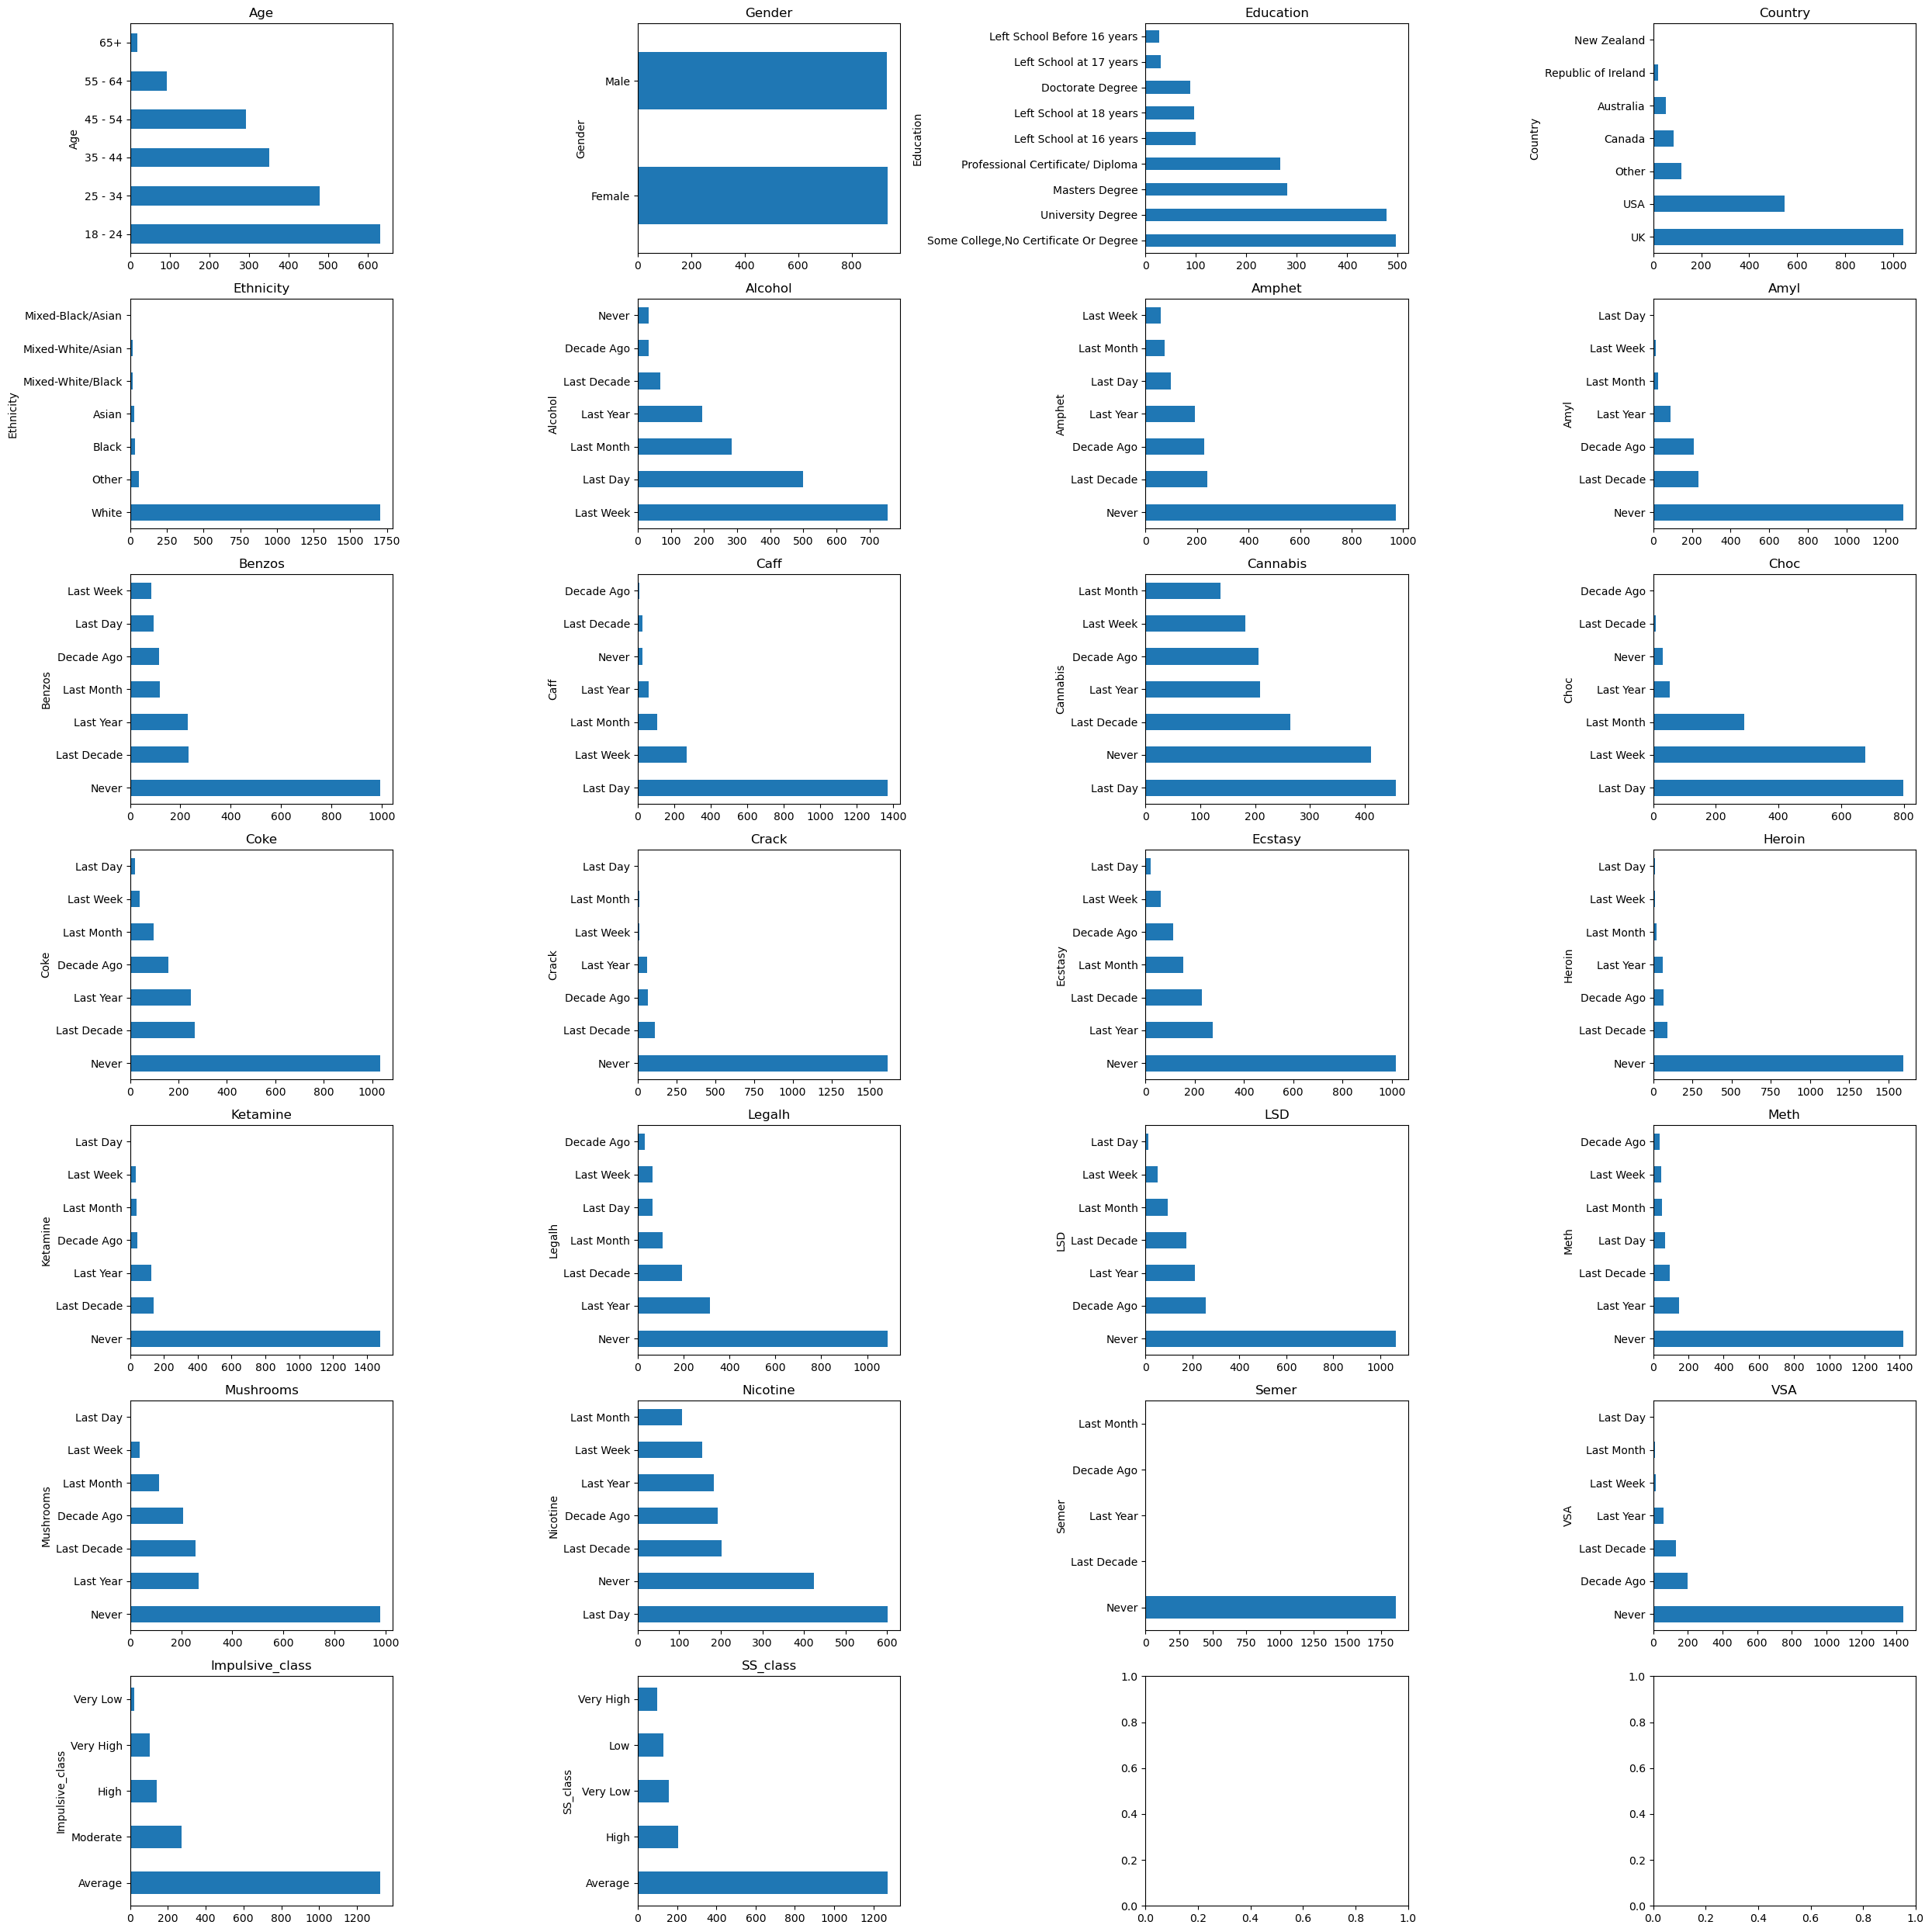

In [15]:
# ploting categorical columns

# Using subplots is the better way to visualize multiple features
plt.subplots(7, 4, figsize=(25, 25))

for i, col in enumerate(cat_cols):
    plt.subplot(7, 4, i+1) # i is used as an index for the grid, the grid starts at 1 

    df[col].value_counts().plot(kind='barh')
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

From the above data, we can observe several key insights. The dataset contains an equal number of data points for each gender. Approximately 78% of the individuals are below 45 years of age. The educational background of most participants includes a Diploma, University Degree, Master's Degree, or some college education. Over 80% of these individuals reside in the UK and USA. Caffeine is the most commonly consumed drug among the participants, while the majority have never used the drug Semer.

- **Note: The majority of the candidates in this dataset are of white ethnicity. The method of data collection for this survey is unclear. Additionally, it is important to consider whether including ethnicity information in the analysis and project is appropriate. Please advise on the best approach to handle this sensitive information.**


We are going to start analysis the data. Going to start from the Personality traits.

The scores 'Nscore', 'Oscore', 'Ascore', 'Escore', and 'Cscore' in the context of your drug consumption classification dataset are likely derived from the Big Five personality traits model, also known as the Five Factor Model (FFM). Each of these scores represents a different dimension of personality:\

**Nscore (Neuroticism Score):**

**What it Tells About the Person:** This score measures emotional stability and the tendency to experience negative emotions such as anxiety, depression, and anger.\
**Reading the Score:** Higher scores indicate higher levels of neuroticism, meaning the person is more prone to stress and emotional instability. Lower scores suggest greater emotional stability and resilience.\
**Oscore (Openness to Experience Score):**

**What it Tells About the Person:** This score assesses creativity, intellectual curiosity, and preference for novelty and variety.\
**Reading the Score:** Higher scores suggest a person is more open to new experiences, imaginative, and creative. Lower scores indicate a preference for routine, practical thinking, and conventional experiences.\
**Ascore (Agreeableness Score):**

**What it Tells About the Person:** This score measures the quality of interpersonal relationships, including traits like compassion, cooperativeness, and trustworthiness.\
**Reading the Score:** Higher scores denote a more agreeable person who is friendly, compassionate, and cooperative. Lower scores suggest a more competitive and less cooperative nature.\
**Escore (Extraversion Score):**

**What it Tells About the Person:** This score evaluates sociability, assertiveness, and the tendency to seek stimulation in the company of others.\
**Reading the Score:** Higher scores indicate a more extroverted person who is outgoing, energetic, and enjoys social interactions. Lower scores are indicative of introversion, suggesting a preference for solitude and quiet environments.\
**Cscore (Conscientiousness Score):**

**What it Tells About the Person:** This score measures the degree of organization, dependability, and goal-directed behavior.\
**Reading the Score:** Higher scores reflect a conscientious person who is disciplined, organized, and reliable. Lower scores suggest a more spontaneous and less reliable nature, with a potential tendency towards disorganization.


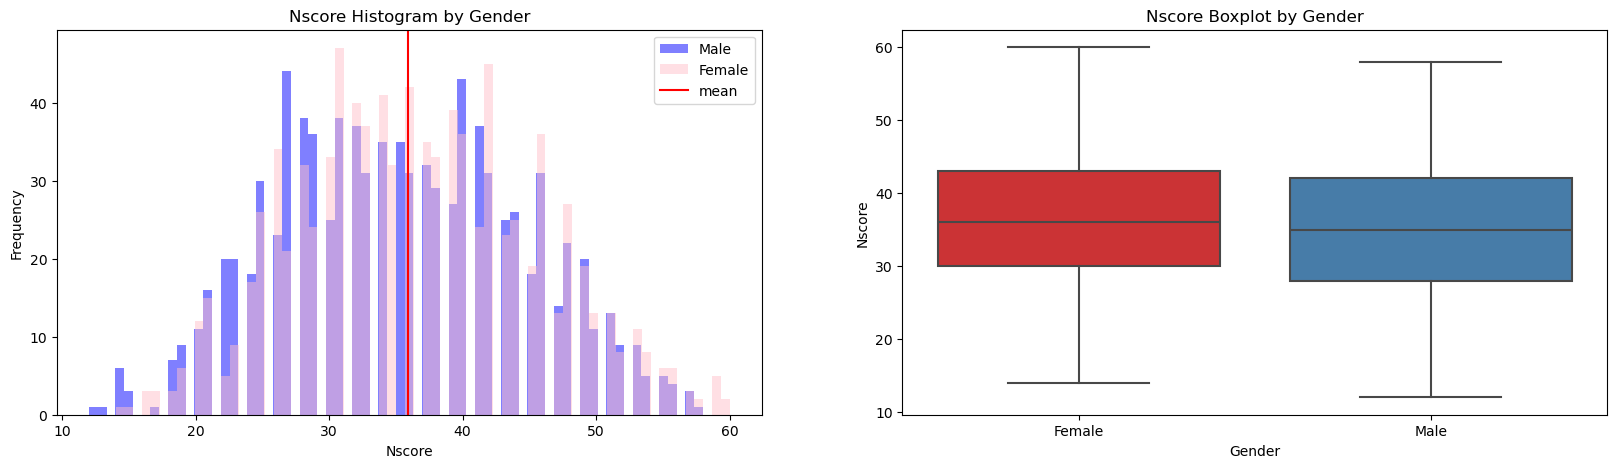

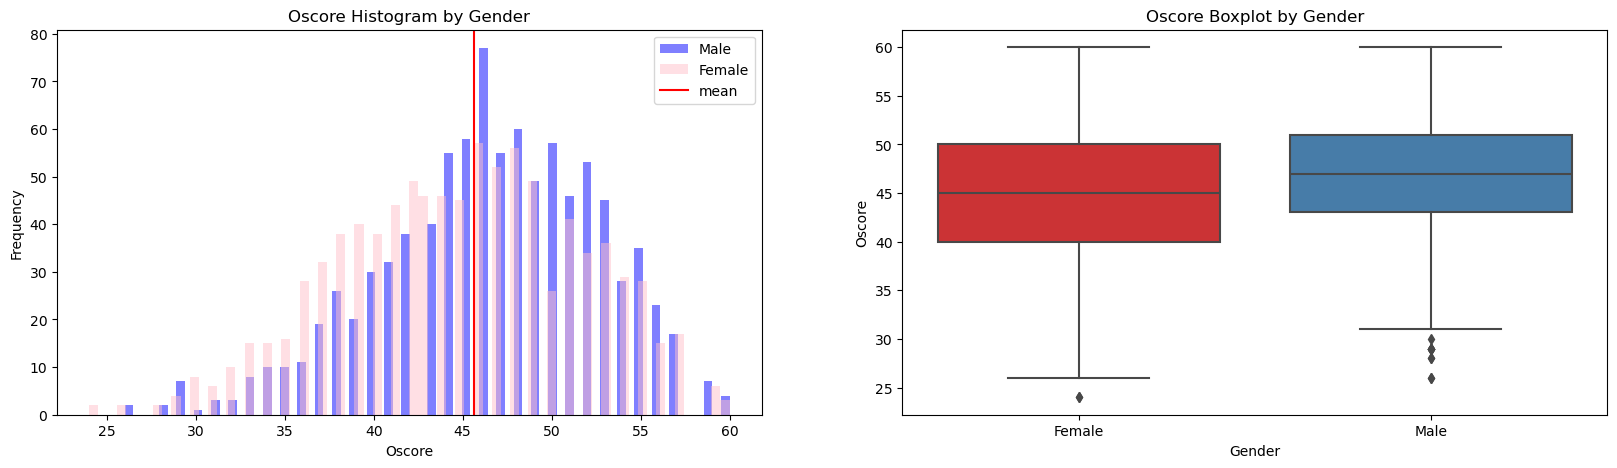

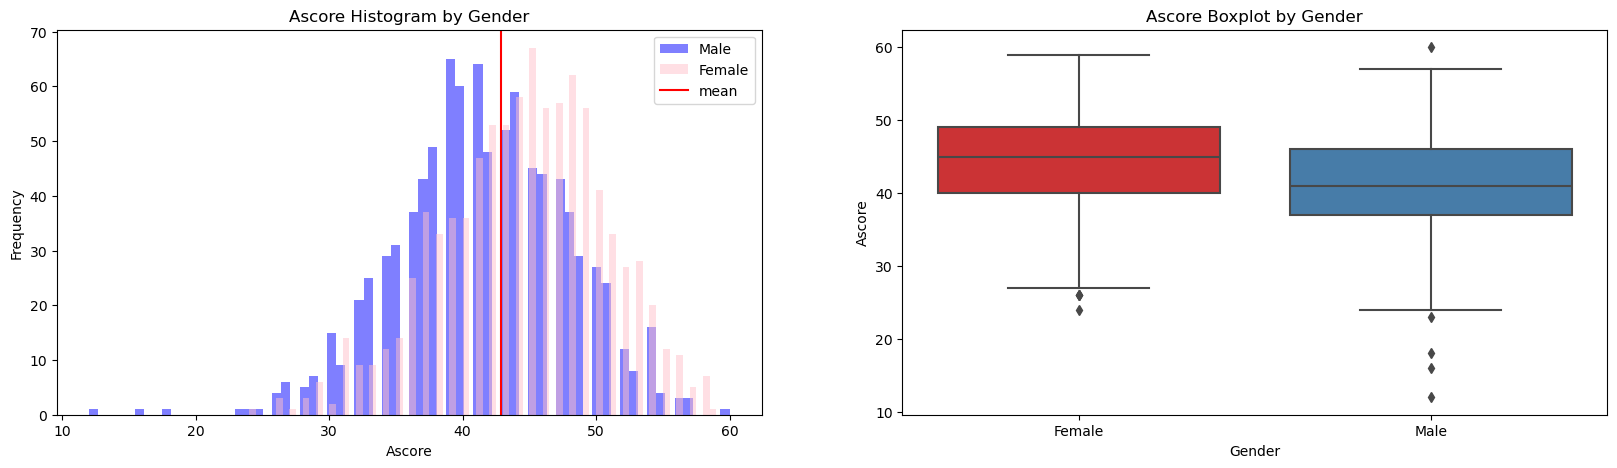

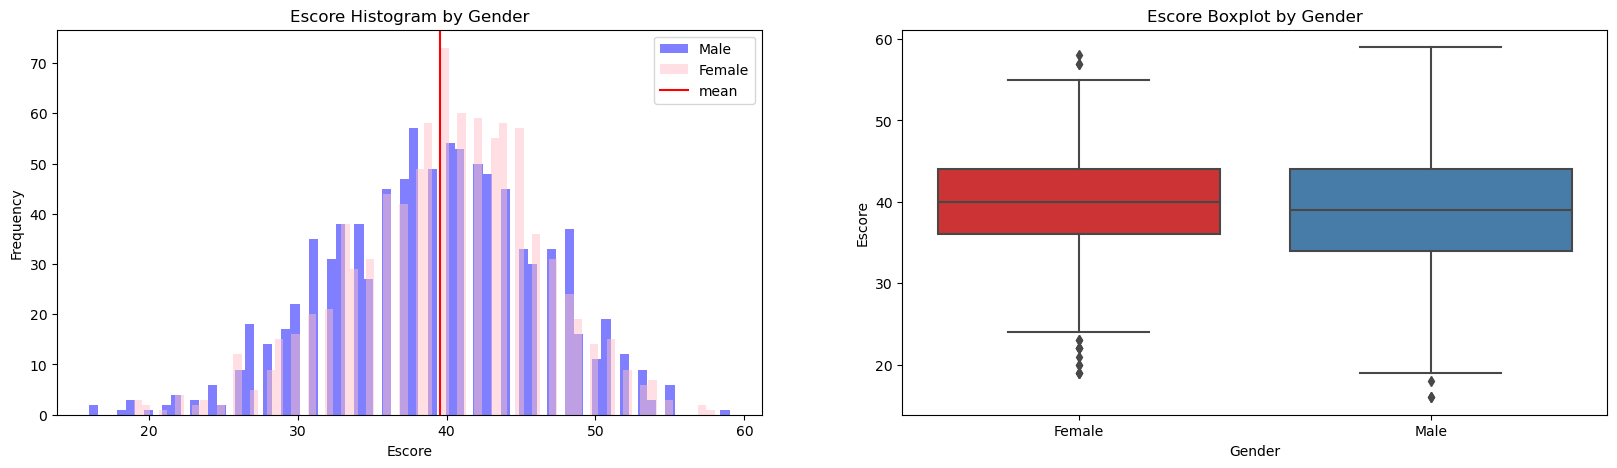

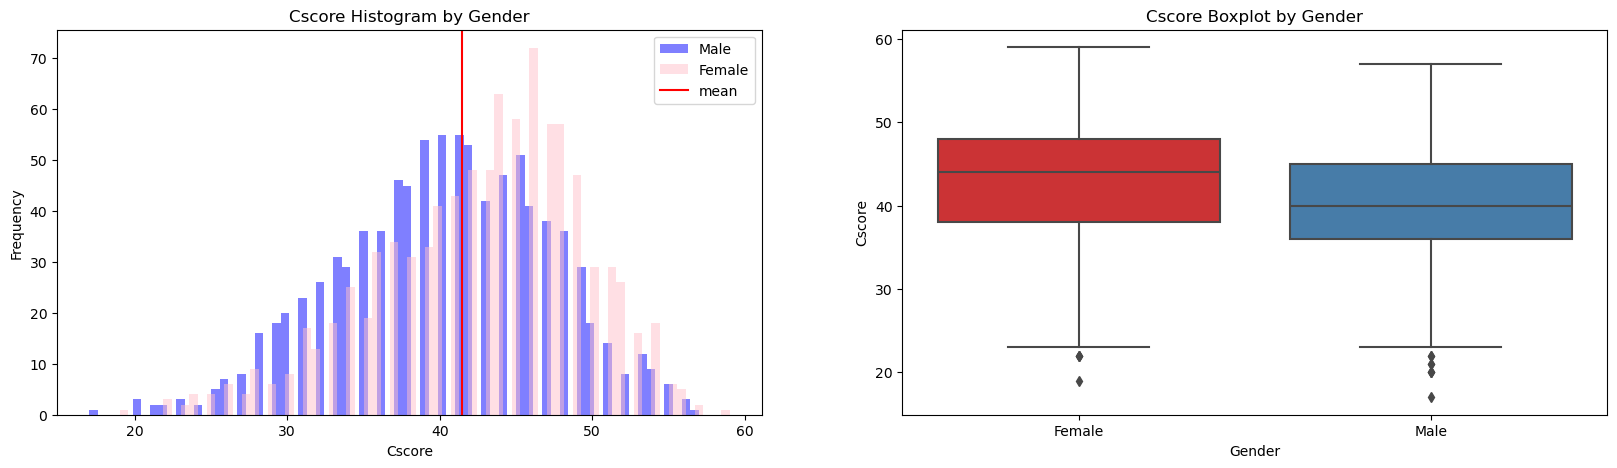

In [22]:
# Use a for loop to generate the plots and use subplots this time
# Visualise the 3 numeric cols using a histogram and boxplot
for col in ['Nscore', 'Oscore', 'Ascore', 'Escore', 'Cscore']:
    plt.figure(figsize=(20, 5))

    # Separate the data by gender for histograms
    male_data = df[df['Gender'] == 'Male']
    female_data = df[df['Gender'] == 'Female']

    # Plot out the histogram
    plt.subplot(1, 2, 1)
    plt.hist(male_data[col], bins=70, alpha=0.5, label='Male', color='blue')
    plt.hist(female_data[col], bins=70, alpha=0.5, label='Female', color='pink')
    plt.axvline(df[col].mean(), c='r', label='mean')
    plt.title(f'{col} Histogram by Gender')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.legend()

    # Plot the boxplot. We can use the seaborn boxplot code for this.
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Gender', y=col, data=df, palette='Set1')
    plt.title(f'{col} Boxplot by Gender')
    plt.xlabel('Gender')
    plt.ylabel(f'{col}')

    plt.show()

**Nscore : (neuroticism)**
The distribution of neuroticism (Nscore) among both genders appears to follow a normal distribution and same pattern, with males exhibiting a slightly lower range of scores. This suggests that while the average level of neuroticism is similar between genders, males show lower variability.\
The boxplot for Nscore reveals that males have slightly lower and less variable neuroticism scores compared to females. The presence of outliers among females indicates that a subset of the female population experiences higher levels of neuroticism.

**Oscore : (Openness to Experience Score)**
The histogram for Oscore shows that both males and females have a relatively normal distribution with slight skew towards right. However, there is a slight skew towards lower scores for females and towards higher scores for males. This suggests that females tend to have a wider range of Oscore values, indicating greater variability in openness among females compared to males.

The boxplot for Oscore reveals that females have slightly lower and less variable Oscores compared to males. The presence of outliers among males indicates that a subset of the male population experiences lower levels of Openness to Experience Score.

**Ascore : (Agreeableness Score)**
The histogram for Ascore shows that both males and females have a relatively normal distribution with slight skew towards right. However, there is a skew towards lower scores for males and towards higher scores for females. This suggests that females tend to have a wider range of Ascore values, indicating greater variability in Agreeableness among females compared to males.

The boxplot for Ascore reveals that males have slightly lower and less variable Ascores compared to females. The presence of outliers among males indicates that a subset of the male population experiences lower levels of Agreeableness Score.

**Escore : (Extraversion Score)**
The histogram for Escore shows that both males and females have a relatively normal distribution with slight skew towards right. However, there is a skew towards lower scores for males and towards higher scores for females. This suggests that females tend to have a wider range of Escore values, indicating greater variability in Extraversion Score among females compared to males.

The boxplot for Escore reveals that both males and females almost same score range around the mean. The presence of outliers among males indicates that a subset of the male population experiences lower levels of Extraversion Score.


**Cscore : (Conscientiousness Score)**
The histogram for Cscore shows that both males and females have a relatively normal distribution with slight skew towards right. However, there is a skew towards lower scores for males and towards higher scores for females. This suggests that females tend to have a wider and higher range of Cscore values, indicating greater variability in Conscientiousness Score among females compared to males.

The boxplot for Cscore reveals that males have lower and less variable Cscores compared to females. The presence of outliers among males indicates that a subset of the male population experiences lower levels of Conscientiousness Score.


## I am going to use the original downloaded dataset which has all features values in numeric to find correations for now to create heatmap.

In [17]:
df_original = pd.read_csv('drug_consumption.csv')

In [18]:
df_original.drop('ID', axis=1, inplace=True)
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1885 non-null   float64
 1   Gender     1885 non-null   float64
 2   Education  1885 non-null   float64
 3   Country    1885 non-null   float64
 4   Ethnicity  1885 non-null   float64
 5   Nscore     1885 non-null   float64
 6   Escore     1885 non-null   float64
 7   Oscore     1885 non-null   float64
 8   Ascore     1885 non-null   float64
 9   Cscore     1885 non-null   float64
 10  Impulsive  1885 non-null   float64
 11  SS         1885 non-null   float64
 12  Alcohol    1885 non-null   object 
 13  Amphet     1885 non-null   object 
 14  Amyl       1885 non-null   object 
 15  Benzos     1885 non-null   object 
 16  Caff       1885 non-null   object 
 17  Cannabis   1885 non-null   object 
 18  Choc       1885 non-null   object 
 19  Coke       1885 non-null   object 
 20  Crack   

In [19]:
# Mapping all the drug types columns values to numeric values
List_of_Columns = df_original[df_original.columns[12:31]]
for col in List_of_Columns:
    df_original[col] = df_original[col].map({
        'CL0':0,
        'CL1':1, 
        'CL2':2, 
        'CL3':3, 
        'CL4':4, 
        'CL5':5,
        'CL6':6
            })

In [20]:
#Calculating the correlation between the features
corr_matrix = df_original.corr()

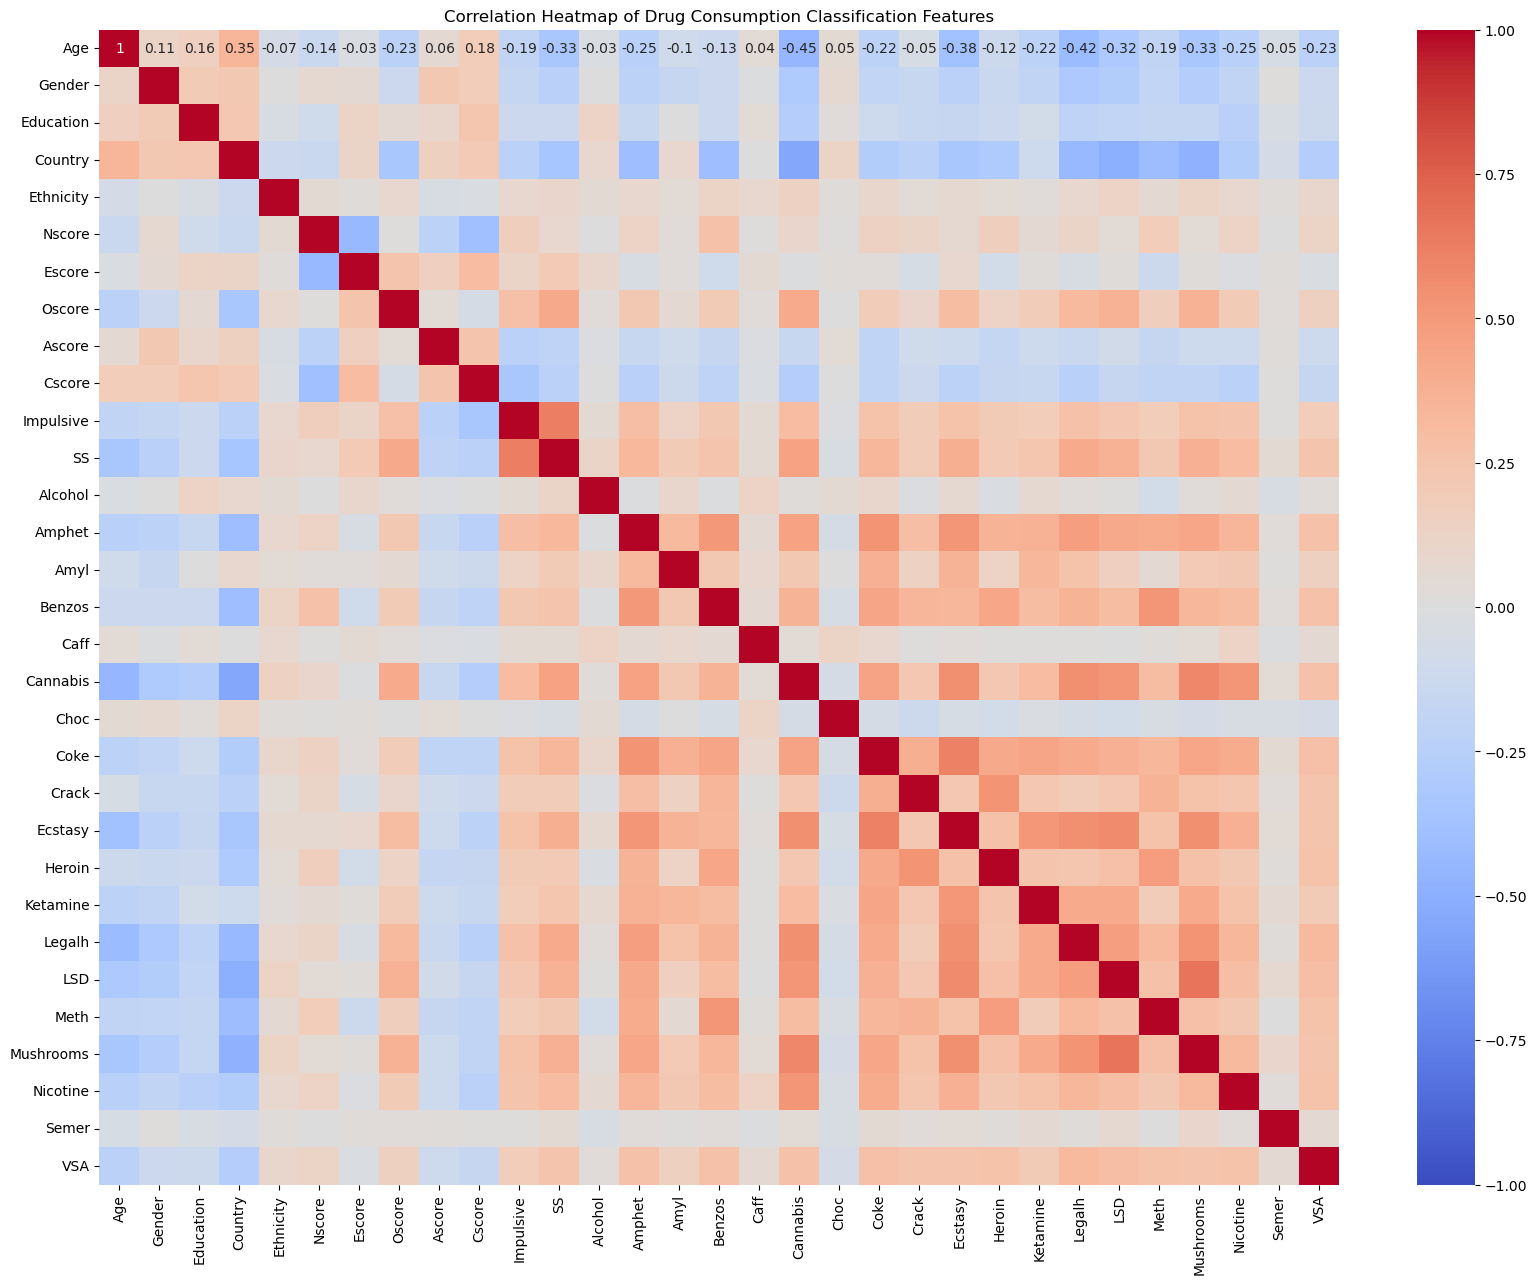

In [26]:
# Showing the correlationship between all the features in heatmap

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm')
plt.title('Correlation Heatmap of Drug Consumption Classification Features')
plt.show()


### Summary based on heatmap
**Age** shows significant negative correlations with many substance uses, suggesting younger individuals are more likely to engage in these activities.\
**Gender** influences substance use patterns, with males possibly more inclined towards certain substances.\
**Personality traits** like Neuroticism, Extraversion, and Sensation Seeking are strongly related to substance use behaviors.\
**Country and Education** also play a role in substance use tendencies, indicating potential cultural and socio-economic influences.

It can be analzed further in detailed. Probably take this up part of EDA 2.

-------
# Hyphotheses
<a id='H'></a>


Based on the part 1 EDA so far, below are the few hypothesis I can think of

**Hypothesis 1**: Personality Traits and Drug Use\
Hypothesis: Individuals with higher Neuroticism (Nscore) are more likely to consume drugs frequently compared to those with lower Neuroticism scores.

**Rationale:** People with higher levels of neuroticism may use drugs as a coping mechanism to manage stress, anxiety, and emotional instability.

**Hypothesis 2**: Age and Drug Consumption\
Hypothesis: Younger individuals (below 30) have a higher tendency to experiment with different types of drugs compared to older age groups (above 45).

**Rationale**: Younger people might be more prone to experimenting and taking risks, including drug use, due to factors like peer pressure and the desire for new experiences.

**Hypothesis 3**: Education Level and Drug Use\
**Hypothesis:** Individuals with lower education levels (high school diploma or below) are more likely to consume illegal drugs compared to those with higher education levels (bachelor's degree or higher).

**Rationale:** Educational attainment can be linked to socio-economic status, awareness, and access to information about the risks associated with drug use.

**Hypothesis 4:** Gender Differences in Drug Use\
**Hypothesis:** Males are more likely to consume recreational drugs such as cannabis and cocaine compared to females.

**Rationale:** Gender differences in risk-taking behavior and social acceptability of drug use may lead to higher consumption rates among males.

**Hypothesis 5:** Sensation Seeking and Drug Use\
**Hypothesis:** Individuals with higher Sensation Seeking (SS) scores are more likely to have used a wider variety of drugs.

**Rationale:** Sensation seekers often pursue novel and intense experiences, which can include experimenting with various drugs.

**Hypothesis 6:** Ethnicity and Drug Consumption Patterns\
**Hypothesis:** There are significant differences in drug consumption patterns among different ethnic groups.

**Rationale:** Cultural background and community norms can influence drug use behavior and attitudes towards different substances.

**Hypothesis 7:** Impulsiveness and Drug Use\
**Hypothesis:** Higher Impulsiveness scores are associated with more frequent use of drugs like amphetamines and cocaine.

**Rationale:** Impulsive individuals may be more likely to engage in drug use due to a lack of consideration for the long-term consequences.

**Hypothesis 8:** Country of Residence and Drug Preferences\
**Hypothesis:** The type and frequency of drug use vary significantly between individuals living in the UK and the USA.

**Rationale:** Differences in drug laws, availability, and cultural attitudes towards drug use in different countries can influence consumption patterns.

**Hypothesis 9:** Conscientiousness and Drug Avoidance\
**Hypothesis:** Individuals with higher Conscientiousness (Cscore) are less likely to consume illegal drugs.

**Rationale:** Conscientious individuals tend to be more disciplined and aware of the consequences of their actions, making them less likely to engage in risky behaviors such as drug use.

**Hypothesis 10:** Alcohol Consumption as a Gateway\
**Hypothesis:** Regular alcohol consumers are more likely to experiment with other recreational drugs.

**Rationale:** Alcohol use can lower inhibitions and lead to increased likelihood of trying other substances.

These hypotheses serve us as starting points for in-depth analysis. We will continue investigating, with the usage of data visualization, appropriate statistical tests, and applying a machine learning models on the data set.

### [BACK TO INDEX](#INDEX)